In [6]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ---------------------------
# 다음 행을 변경하세요
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(type(X_train),type(y_train))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


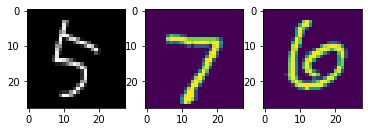

In [8]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('dataset/r15.png')
img_cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(img_cvt)
plt.subplot(1, 3, 2)
plt.imshow(X_test[0])
plt.subplot(1, 3, 3)
plt.imshow(X_test[11])
plt.show()



In [11]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

path = 'dataset/'
fileNum = 30
filenames =[]
for i in range(1,fileNum+1):
    filenames.append('r'+str(i)+'.png')

X_test_user = []
for i in range(len(filenames)):
    img = cv2.imread(path + filenames[i])
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
    X_test_user.append(img_gray)

X_test_user = np.array(X_test_user)
y_test_list = [1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0]


X_test_user = X_test_user.reshape(X_test_user.shape[0], 784)[:len(filenames)]
y_test_user = to_categorical(y_test_list)[:len(filenames)]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

path = 'dataset/'
fileNum = 30
filenames =[]
for i in range(1,fileNum+1):
    filenames.append('r'+str(i)+'.png')

y_test_list = [1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0]            
X_test_user = []
for i in range(len(filenames)):
    img = cv2.imread(path + filenames[i])
    img_cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # img_cvt = 255 - img_cvt
    img_gray = cv2.cvtColor(img_cvt,cv2.COLOR_RGB2GRAY)
    X_test_user.append(img_gray)
    # plt.subplot(2, 10, i + 1)
    # plt.imshow(img_cvt)
# plt.show()

X_test_user = np.array(X_test_user)
y_test_user = np.array(y_test_list)

X_train = X_train.reshape(X_train.shape[0], 784)[:60000]
y_train = to_categorical(y_train)[:60000]
X_test = X_test.reshape(X_test.shape[0], 784)[:10000]
y_test = to_categorical(y_test)[:10000]


X_test_user = X_test_user.reshape(X_test_user.shape[0], 784)[:len(filenames)]
y_test_user = to_categorical(y_test_user)[:len(filenames)]

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
model = Sequential()

model.add(Dense(256, input_dim=784))
# 하이퍼 파라미터: 활성화 함수
model.add(Activation("sigmoid"))
# 하이퍼 파라미터: 은닉층의 수, 은닉층의 채널 수
model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("sigmoid"))
# 하이퍼 파라미터: 드롭아웃 비율(rate)
model.add(Dropout(rate=0.50))
model.add(Dense(10))
model.add(Activation("softmax"))

# 하이퍼 파라미터: 학습 비율(Ir)
sgd = optimizers.SGD(lr=0.05)

# 하이퍼 파라미터: 최적화 함수(optimizer)
# 하이퍼 파라미터: 오차 함수(loss)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# 하이퍼 파라미터: 배치 처리 크기(batch_size)
# 하이퍼 파라미터: epoch 수(epochs)
model.fit(X_train, y_train, batch_size=200, epochs=20, verbose=1)

score = model.evaluate(X_test, y_test, verbose=1)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))


Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 2.3026 - accuracy: 0.1627
Epoch 2/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.7629 - accuracy: 0.4035
Epoch 3/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.2061 - accuracy: 0.5911
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.9033 - accuracy: 0.7122
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.7208 - accuracy: 0.7877
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.5979 - accuracy: 0.8323
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.5187 - accuracy: 0.8569
Epoch 8/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4631 - accuracy: 0.8735
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.4188 - accuracy: 0.8857
Epoch 10/20
60000/60000 [==============================

In [13]:
# CNN
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 로드합니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 전체 데이터 중 학습에는 300장, 테스트에는 100장의 데이터를 사용합니다
# Conv 층는 4차원 배열을 받아들입니다(배치 크기×가로×세로×채널 수)
# MNIST 데이터는 RGB 이미지가 아니라 원래 3차원 데이터이므로 미리 4차원으로 변환합니다
X_train = X_train[:60000].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:60000]
y_test = to_categorical(y_test)[:100]

# 모델을 정의합니다
model = Sequential()

# --------------------------------------------------------------
# 여기에 코드를 작성하세요
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
# --------------------------------------------------------------

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=200,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

# # 정확도를 평가합니다
# scores = model.evaluate(X_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

# # 데이터를 시각화합니다(테스트 데이터의 선두 10장)
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(X_test[i].reshape((28,28)), 'gray')
# plt.suptitle("The first ten of the test data",fontsize=20)
# plt.show()

# # 예측합니다(테스트 데이터의 선두 10장)
# pred = np.argmax(model.predict(X_test[0:10]), axis=1)
# print(pred)

# model.summary()

Train on 60000 samples, validate on 100 samples
Epoch 1/10
60000/60000 [==============================] - 35s 576us/step - loss: 1.1648 - accuracy: 0.8438 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.1522 - accuracy: 0.9571 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.1013 - accuracy: 0.9704 - val_loss: 0.0270 - val_accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.0754 - accuracy: 0.9784 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.0623 - accuracy: 0.9825 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/10
60000/60000 [==============================] - 

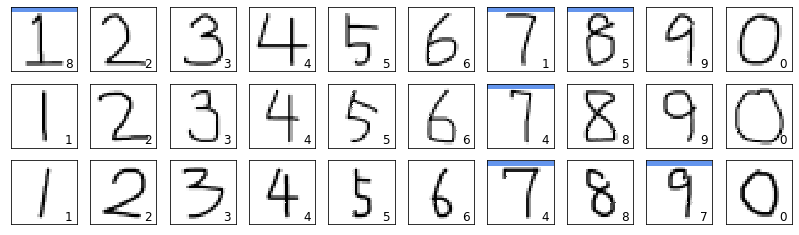

In [14]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 30
    y = model.predict(My_test) # (A)
    plt.figure(2, figsize=(14, 4))
    plt.gray()
    for i in range(n_show):
        plt.subplot(3, 10, i + 1)
        x = My_test[i, :]
        x = 255-x #반전
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        plt.pcolor(x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12,)
        if prediction != np.argmax(My_y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")



#-- 메인
path = 'dataset/'
#파일이름  list로
filenames =[]
fileNum = 30
for i in range(1,fileNum+1):
    filenames.append('r'+str(i)+'.png')

y_test_list = [1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0]            
X_test_user = []
for i in range(len(filenames)):
    img = cv2.imread(path + filenames[i])
    img_cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # img_cvt = 255 - img_cvt
    img_gray = cv2.cvtColor(img_cvt,cv2.COLOR_RGB2GRAY)
    X_test_user.append(img_gray)
    # plt.subplot(2, 10, i + 1)
    # plt.imshow(img_cvt)
# plt.show()

X_test_user = np.array(X_test_user)
y_test_user = np.array(y_test_list)
X_test_user = X_test_user[:fileNum].reshape(-1, 28, 28, 1)
y_test_user = to_categorical(y_test_user)[:fileNum]

My_test = X_test_user
My_y_test = y_test_user
show_prediction()
plt.show()


- 이미지를 써서 인식하는 코드

In [15]:
# from https://webnautes.tistory.com/1405

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 128
num_classes = 10
epochs = 12


img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=2)

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 468 steps, validate on 10000 samples
Epoch 1/12
468/468 - 35s - loss: 1.1366 - accuracy: 0.6195 - val_loss: 0.1773 - val_accuracy: 0.9555
Epoch 2/12
468/468 - 35s - loss: 0.6035 - accuracy: 0.8106 - val_loss: 0.1364 - val_accuracy: 0.9616
Epoch 3/12
468/468 - 35s - loss: 0.4716 - accuracy: 0.8542 - val_loss: 0.1160 - val_accuracy: 0.9658
Epoch 4/12
468/468 - 35s - loss: 0.4071 - accuracy: 0.8756 - val_loss: 0.1173 - val_accuracy: 0.9659
Epoch 5/12
468/468 - 36s - loss: 0.3615 - accuracy: 0.8902 - val_loss: 0.1013 - val_accuracy: 0.9692
Epoch 6/12
468/468 - 35s - loss: 0.3363 - accuracy: 0.8980 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 7/12
468/468 - 35s - loss: 0.3134 - accuracy: 0.9041 - val_loss: 0.0895 - val_accuracy: 0.9724
Epoch 8/12
468/468 - 36s - loss: 0.2991 - accuracy: 0.9098 - val_loss: 0.0702 - val_accuracy: 0.9794
Epoch 9/12
468/468 - 35s - loss: 0.2843 - ac

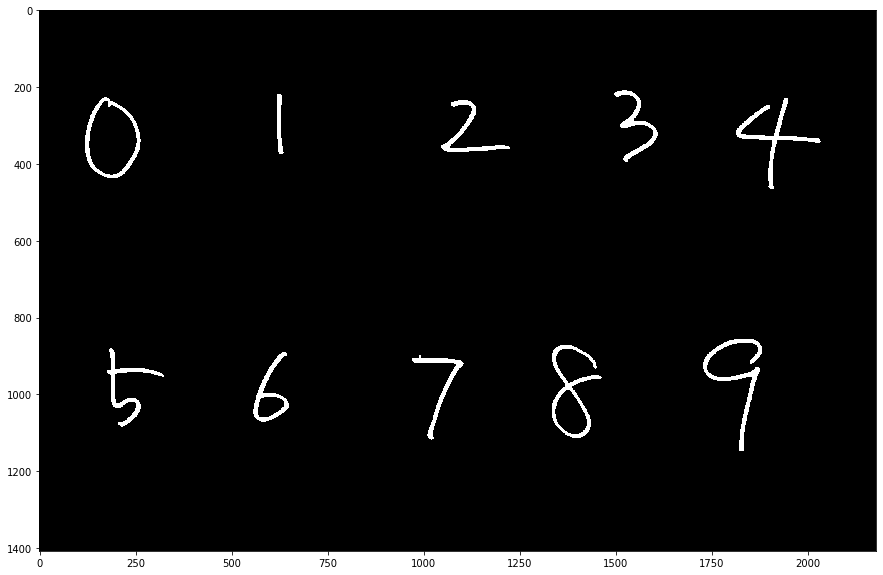

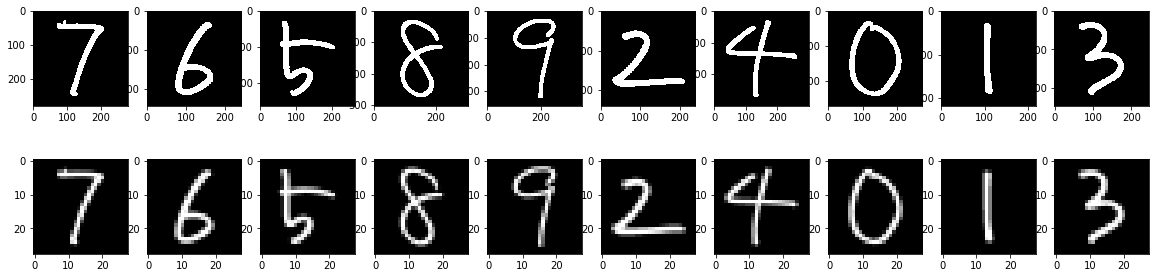

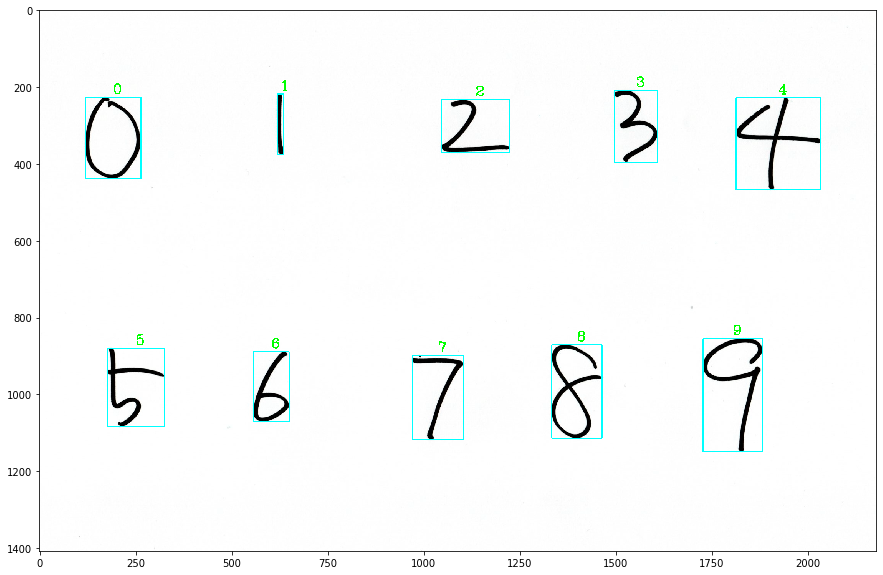

In [19]:
# from : https://webnautes.tistory.com/1405

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 이미지 로드
img_color = cv2.imread('dataset/hand_write.jpg', cv2.IMREAD_COLOR)
# plt.show()를 위해 RGB변환
img_cvt = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_cvt, cv2.COLOR_RGB2GRAY)

# OTSU 이진화
ret,img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

#모폴로지 CLOSING
# 형태소 생성(5x5 사각형 모양) 
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( 5, 5 ) )
img_binary = cv2.morphologyEx(img_binary, cv2. MORPH_CLOSE, kernel)

#이미지 출력
fig = plt.figure(figsize=(15,15))
plt.imshow(img_binary)
plt.show()

# Contour 찾기
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#subplot 출력하기 위한 변수
n = 1;k=11
#subplot 그림 크기 지정
fig=plt.figure(figsize=(20, 5))

#contour 출력
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # 가로세로 가운데 최대값 구하기(긴값을 길이로 정함) + 여백(60)
    length = max(w, h) + 60
    # 추출한 길이로 사각형 구하기
    img_digit = np.zeros((length, length, 1),np.uint8)
    # 이미지 중심점 구하기
    new_x,new_y = x-(length - w)//2, y-(length - h)//2

    # 새로운 이미지의 중심으로 추출한 이미지 이동
    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]

    # 이미지를 다시 확장(dialation 진행)
    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv2.morphologyEx(img_digit, cv2.MORPH_DILATE, kernel)

    
    fig.add_subplot(2, 10, n)
    plt.imshow(img_digit)
    n+=1
    # plt.show()

    model = load_model('model.h5')

    # 이미지를 28 x 28 로 변환
    img_digit = cv2.resize(img_digit, (28, 28), interpolation=cv2.INTER_AREA)

    # 이미지를 실수형으로 변환
    img_digit = img_digit / 255.0

    # 이미지 형태로 (1,28,28,1) 형태로 변환
    img_input = img_digit.reshape(1, 28, 28, 1)
    # 예측 진행 : 원핫 인코딩 방식
    predictions = model.predict(img_input)

    # 값을 0~9값으로 변환
    number = np.argmax(predictions)
    # print(number)

    # 사각형을 원래 그림에 그리기
    cv2.rectangle(img_color, (x, y), (x+w, y+h), (0, 255, 255), 2)

    # 원래 그림에 예측값 TEXT로 출력
    location = (x + int(w *0.5), y - 10)
    font = cv2.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv2.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)

    fig.add_subplot(2, 10, k)
    plt.imshow(img_digit)
    k+=1

plt.show()

fig = plt.figure(figsize=(15,15))
plt.imshow(img_color)
plt.show()

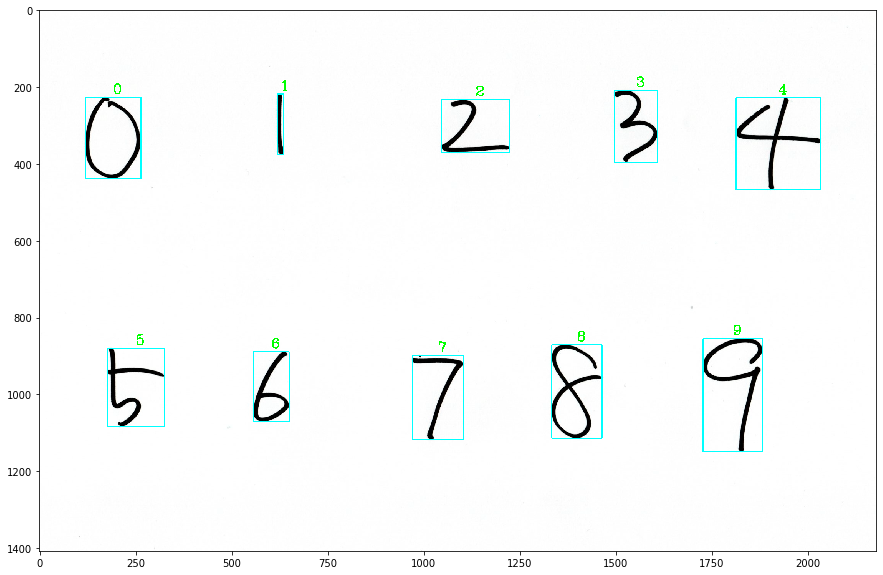

In [20]:
fig = plt.figure(figsize=(15,12))

plt.imshow(img_color)
plt.show()